% packages

In [1]:
import graphlib
import numpy as np
import pandas as pd
import torch
import torch.nn as nn 
import seaborn as sns
import pandas as pd

% data import

In [2]:
cars_file = 'https://gist.githubusercontent.com/noamross/e5d3e859aa0c794be10b/raw/b999fb4425b54c63cab088c0ce2c0d6ce961a563/cars.csv'
cars = pd.read_csv(cars_file)
cars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


% visualise the model

<Axes: xlabel='wt', ylabel='mpg'>

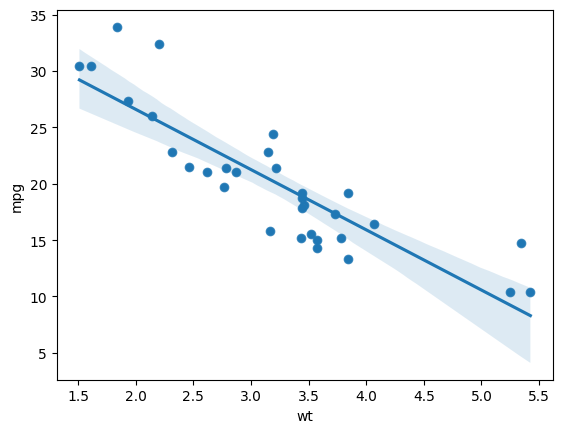

In [3]:
sns.scatterplot(x='wt', y='mpg', data=cars)
sns.regplot(x='wt', y='mpg', data=cars)

% convert data to tensor

In [4]:
X_list = cars.wt.values
X_np = np.array(X_list, dtype=np.float32).reshape(-1,1)
y_list = cars.mpg.values
y_np = np.array(y_list, dtype=np.float32).reshape(-1,1)
X = torch.from_numpy(X_np)
y_true = torch.from_numpy(y_np)

%

In [5]:
class LinearRegressionTorch(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegressionTorch, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        return self.linear(x)

In [7]:
input_dim = 1
output_dim = 1
model = LinearRegressionTorch(input_size=input_dim, output_size=output_dim)
model.train()

LinearRegressionTorch(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

%% Mean Squared Error

In [8]:
loss_fun = nn.MSELoss()

% Optimizer

In [9]:
learning_rate = 0.02
# test different values of too large 0.1 and too small 0.001
# best 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

C:\Users\vivek\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


% perform training

In [10]:
losses = []
slope, bias = [], []
NUM_EPOCHS = 1000
BATCH_SIZE = 2
for epoch in range(NUM_EPOCHS):
    for i in range(0, X.shape[0], BATCH_SIZE):
        # set gradients to zero
        optimizer.zero_grad()

        # forward pass
        y_pred = model(X[i:i+BATCH_SIZE])

        # calculate loss
        loss = loss_fun(y_pred, y_true[i:i+BATCH_SIZE])
        loss.backward()

        # update parameters
        optimizer.step()

        # get parameters
        for name, param in model.named_parameters():
            if param.requires_grad:
                if name == 'linear.weight':
                    slope.append(param.data.numpy()[0][0])
                if name == 'linear.bias':
                    bias.append(param.data.numpy()[0])
        # store loss
        losses.append(float(loss.data))
        # print loss
        if (epoch % 100 == 0):
            print(f"Epoch {epoch}, Loss: {loss.data}")

Epoch 0, Loss: 527.647705078125
Epoch 0, Loss: 264.2948913574219
Epoch 0, Loss: 18.494583129882812
Epoch 0, Loss: 46.01787567138672
Epoch 0, Loss: 21.50429344177246
Epoch 0, Loss: 24.1572265625
Epoch 0, Loss: 7.29110860824585
Epoch 0, Loss: 188.1282958984375
Epoch 0, Loss: 442.2782897949219
Epoch 0, Loss: 638.798583984375
Epoch 0, Loss: 33.849002838134766
Epoch 0, Loss: 47.883792877197266
Epoch 0, Loss: 152.2022247314453
Epoch 0, Loss: 302.14080810546875
Epoch 0, Loss: 21.56490135192871
Epoch 0, Loss: 37.174617767333984
Epoch 100, Loss: 0.5102927684783936
Epoch 100, Loss: 4.7613606452941895
Epoch 100, Loss: 0.5572138428688049
Epoch 100, Loss: 17.221284866333008
Epoch 100, Loss: 4.253091335296631
Epoch 100, Loss: 1.18519926071167
Epoch 100, Loss: 2.184479236602783
Epoch 100, Loss: 4.052701950073242
Epoch 100, Loss: 29.496200561523438
Epoch 100, Loss: 11.573253631591797
Epoch 100, Loss: 43.661338806152344
Epoch 100, Loss: 25.934219360351562
Epoch 100, Loss: 8.810224533081055
Epoch 100, L

%% visualise model training

<Axes: >

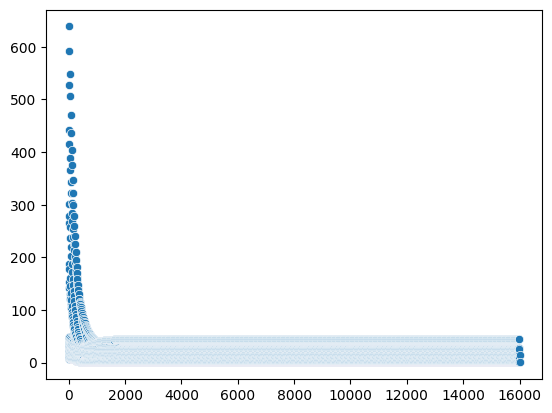

In [11]:
sns.scatterplot(x=range(len(losses)), y=losses)

% visualise the bias development

In [ ]:
sns.lineplot(x=range(NUM_EPOCHS), y=bias)
#%% visualise the slope development
sns.lineplot(x=range(NUM_EPOCHS), y=slope)

%% check the result

In [ ]:
model.eval()
y_pred = [i[0] for i in model(X).data.numpy()]
y = [i[0] for i in y_true.data.numpy()]
sns.scatterplot(x=X_list, y=y)
sns.lineplot(x=X_list, y=y_pred, color='red')
# %%
import hiddenlayer as hl
graph = hl.build_graph(model, X)
# %%